In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

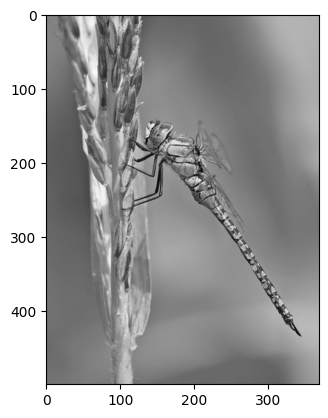

In [3]:
DATADIR = "D:/odonata"
CATEGORIES = os.listdir(DATADIR)

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        
        plt.imshow(img_array, cmap='gray')
        break
    break